In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Convolutional Neural Networks


In this exercise, you will train a simple CNN to classify images from the CIFAR10 dataset.


1. Download the CIFAR10 dataset using `torchvision.datasets.CIFAR10`, and build the train and test dataloaders, setting the batch size to 32 and activating reshuffling at each epoch for the train data by setting `shuffle=True`. Visualize some images and their different color channels.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_data = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_data = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

batch_size = 32

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=100)

100%|██████████| 170498071/170498071 [00:01<00:00, 92306719.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


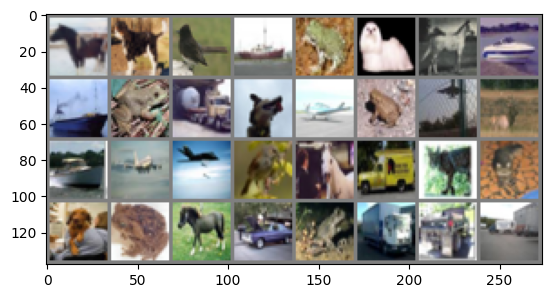

['horse', 'dog', 'bird', 'ship', 'frog', 'dog', 'horse', 'ship', 'ship', 'frog', 'truck', 'dog', 'plane', 'frog', 'plane', 'deer', 'ship', 'plane', 'plane', 'bird', 'horse', 'truck', 'cat', 'cat', 'dog', 'frog', 'horse', 'car', 'frog', 'truck', 'truck', 'truck']


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print([classes[labels[j]] for j in range(batch_size)])

In [ ]:
images.shape

torch.Size([32, 3, 32, 32])

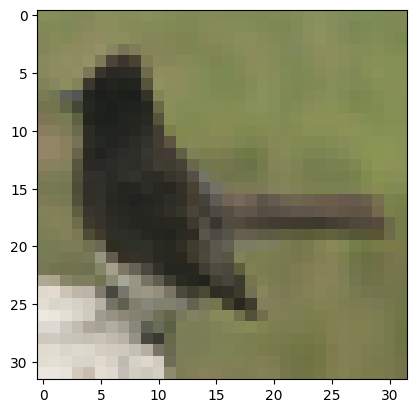

In [ ]:
imshow(images[2])

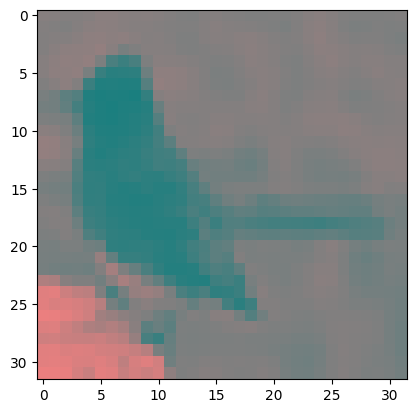

In [ ]:
im_red = images[2].clone()
im_red[1:3,:,:] = 0.
imshow(im_red) # Red channel of the image

2. Define a function returning a convolutional neural network built with `nn.Sequential`. Use a first layer of 6 convolutional channels with filter size 5, a max-pooling layer over a $2 \times 2$ window, a second convolutional layer made of 16 channels with filter size 5, another $2 \times 2$ max-pooling layer, two dense layers with 120 and 84 neurons respectively, and a final linear layer with 10 outputs.

In [ ]:
def initialize_cnn():

    return nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(6, 16, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )

3. Using the cross-entropy loss and SGD with learning rate 0.01, train the model for 5 epochs. After training, compute the accuracy on the test set.

In [ ]:
model = initialize_cnn()

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5

for epoch in range(epochs):

    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):

        inputs, labels = data

        outputs = model(inputs) # Forward
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward() # Backward
        optimizer.step() # Gradient step

        running_loss += loss.item()
        print_every = 200
        if i % print_every == print_every - 1:
            print(f'epoch {epoch + 1} \t batch {i + 1} \t loss: {(running_loss/print_every):.3f}')
            running_loss = 0.0

print('Done!')

epoch 1 	 batch 200 	 loss: 2.305
epoch 1 	 batch 400 	 loss: 2.302
epoch 1 	 batch 600 	 loss: 2.300
epoch 1 	 batch 800 	 loss: 2.297
epoch 1 	 batch 1000 	 loss: 2.290
epoch 1 	 batch 1200 	 loss: 2.265
epoch 1 	 batch 1400 	 loss: 2.196
epoch 2 	 batch 200 	 loss: 1.979
epoch 2 	 batch 400 	 loss: 1.927
epoch 2 	 batch 600 	 loss: 1.880
epoch 2 	 batch 800 	 loss: 1.838
epoch 2 	 batch 1000 	 loss: 1.796
epoch 2 	 batch 1200 	 loss: 1.771
epoch 2 	 batch 1400 	 loss: 1.729
epoch 3 	 batch 200 	 loss: 1.679
epoch 3 	 batch 400 	 loss: 1.658
epoch 3 	 batch 600 	 loss: 1.650
epoch 3 	 batch 800 	 loss: 1.604
epoch 3 	 batch 1000 	 loss: 1.605
epoch 3 	 batch 1200 	 loss: 1.584
epoch 3 	 batch 1400 	 loss: 1.564
epoch 4 	 batch 200 	 loss: 1.521
epoch 4 	 batch 400 	 loss: 1.509
epoch 4 	 batch 600 	 loss: 1.479
epoch 4 	 batch 800 	 loss: 1.470
epoch 4 	 batch 1000 	 loss: 1.485
epoch 4 	 batch 1200 	 loss: 1.472
epoch 4 	 batch 1400 	 loss: 1.476
epoch 5 	 batch 200 	 loss: 1.439
ep

In [ ]:
correct = 0
total = 0

with torch.no_grad():

    for data in test_dataloader:

        images, labels = data

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total}')

Test accuracy: 49.4


# Exercise 2: Momentum

1. Making an analogy with a physical system, we can think of the negative gradient as a force moving a particle through parameter space, following Newton’s laws. Adding a momentum or inertia term, the optimization algorithm remembers the directions of the past gradients and continues to move in their direction. Mathematically,
\begin{equation}
    v_t = \gamma v_{t-1} + \eta \nabla_\theta L(\theta_t)
\end{equation}
\begin{equation}
    \theta_{t+1} = \theta_t - v_t,
\end{equation}
where $\gamma \in [0,1]$ is the momentum parameter, $\eta$ the learning rate, and $\theta$ the parameters of the model. Momentum helps the optimization dynamics gain speed in directions with persistent small gradients and suppresses oscillations. Repeat training, adding `momentum=0.9` to the SGD dynamics.

In [ ]:
model = initialize_cnn()

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=.9)

epochs = 5

for epoch in range(epochs):

    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):

        inputs, labels = data

        outputs = model(inputs) # Forward
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward() # Backward
        optimizer.step() # Gradient step

        running_loss += loss.item()
        print_every = 200
        if i % print_every == print_every - 1:
            print(f'epoch {epoch + 1} \t batch {i + 1} \t loss: {(running_loss/print_every):.3f}')
            running_loss = 0.0

print('Done!')

epoch 1 	 batch 200 	 loss: 2.216
epoch 1 	 batch 400 	 loss: 1.936
epoch 1 	 batch 600 	 loss: 1.753
epoch 1 	 batch 800 	 loss: 1.680
epoch 1 	 batch 1000 	 loss: 1.574
epoch 1 	 batch 1200 	 loss: 1.544
epoch 1 	 batch 1400 	 loss: 1.510
epoch 2 	 batch 200 	 loss: 1.408
epoch 2 	 batch 400 	 loss: 1.406
epoch 2 	 batch 600 	 loss: 1.374
epoch 2 	 batch 800 	 loss: 1.364
epoch 2 	 batch 1000 	 loss: 1.337
epoch 2 	 batch 1200 	 loss: 1.290
epoch 2 	 batch 1400 	 loss: 1.299
epoch 3 	 batch 200 	 loss: 1.233
epoch 3 	 batch 400 	 loss: 1.191
epoch 3 	 batch 600 	 loss: 1.222
epoch 3 	 batch 800 	 loss: 1.210
epoch 3 	 batch 1000 	 loss: 1.196
epoch 3 	 batch 1200 	 loss: 1.219
epoch 3 	 batch 1400 	 loss: 1.204
epoch 4 	 batch 200 	 loss: 1.113
epoch 4 	 batch 400 	 loss: 1.144
epoch 4 	 batch 600 	 loss: 1.110
epoch 4 	 batch 800 	 loss: 1.132
epoch 4 	 batch 1000 	 loss: 1.105
epoch 4 	 batch 1200 	 loss: 1.137
epoch 4 	 batch 1400 	 loss: 1.129
epoch 5 	 batch 200 	 loss: 1.025
ep

In [ ]:
correct = 0
total = 0

with torch.no_grad():

    for data in test_dataloader:

        images, labels = data

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total}')

Test accuracy: 59.85


# Exercise 3: Feature Maps

1. Using t`orch.fx`, we can visualize the transformations of an input inside our neural network. For different input images, check the outputs of the first convolutional layer, of the first ReLU application, and of the first pooling layer.


In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor

nodes, _ = get_graph_node_names(model)
print(nodes)

feature_extractor = create_feature_extractor(
	model, return_nodes=['0', '1', '2'])

['input', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


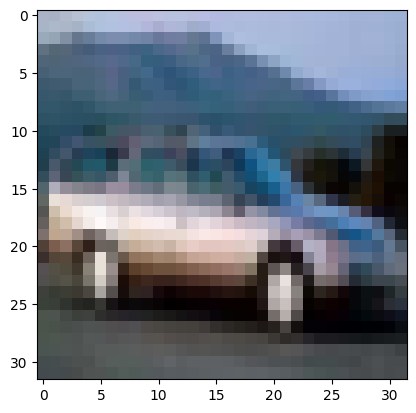

conv1


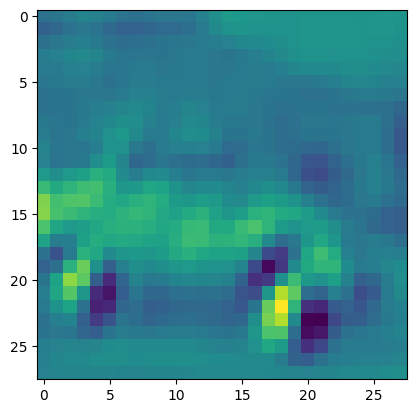

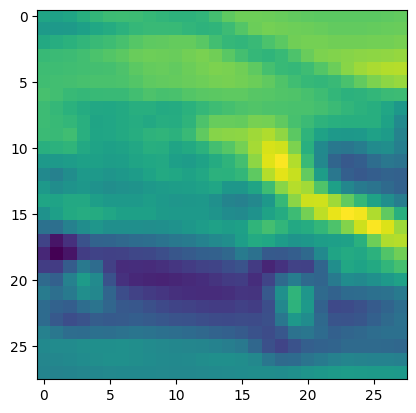

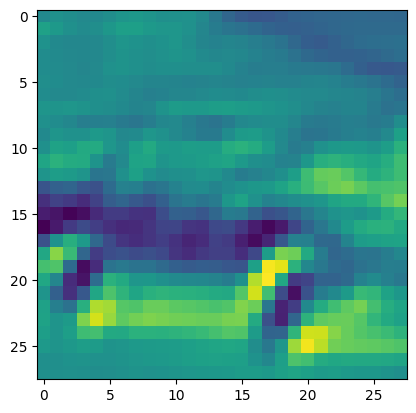

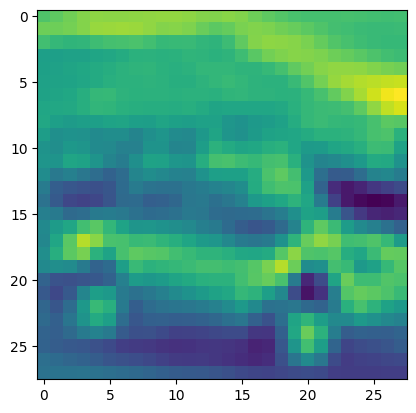

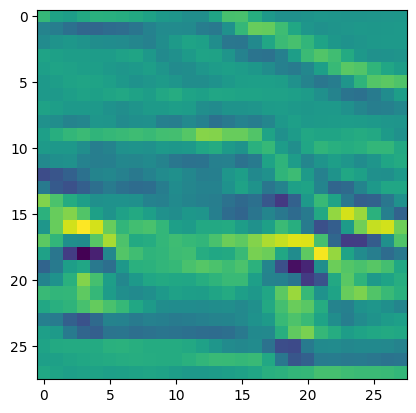

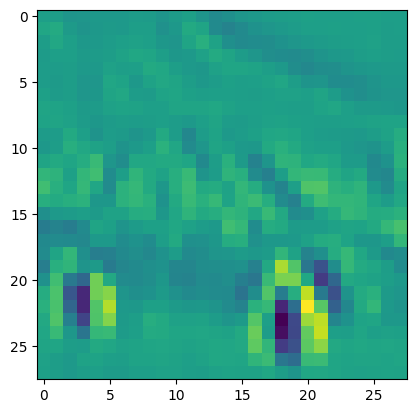

relu


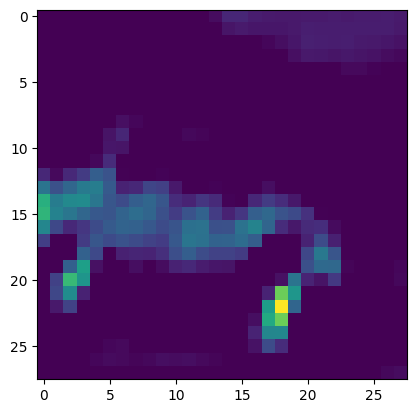

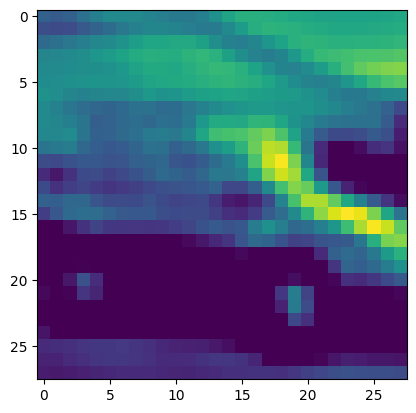

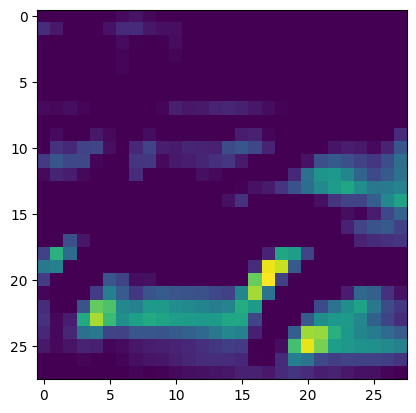

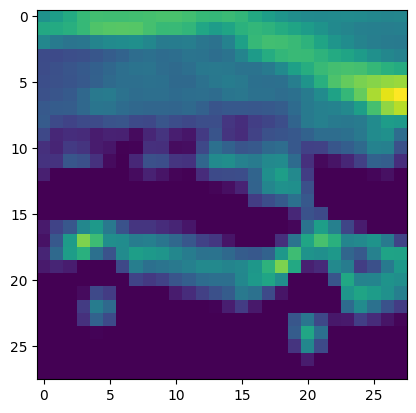

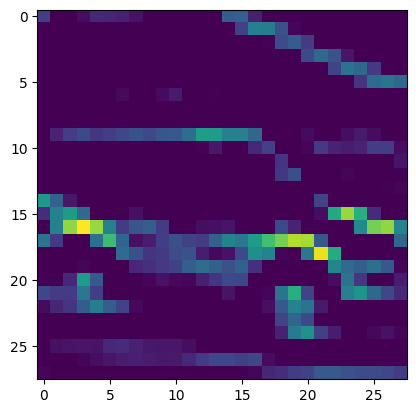

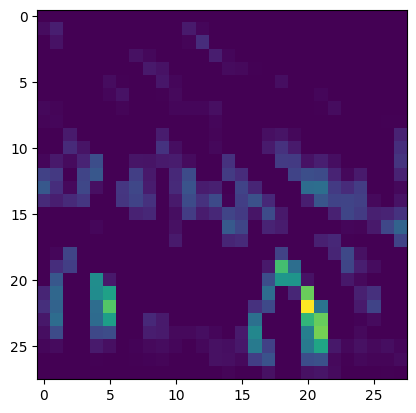

pool


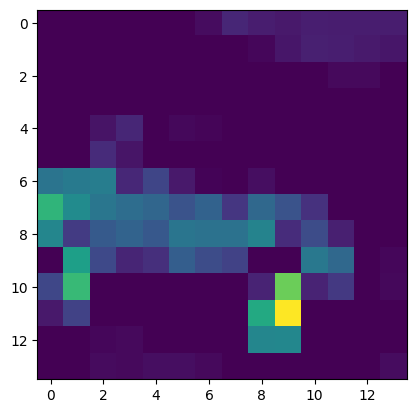

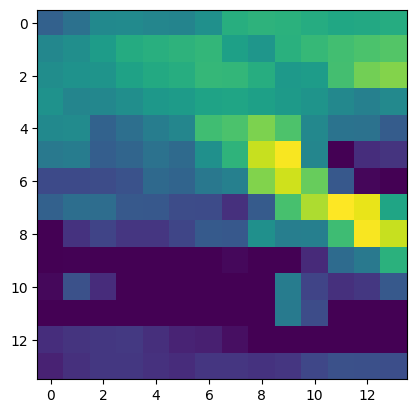

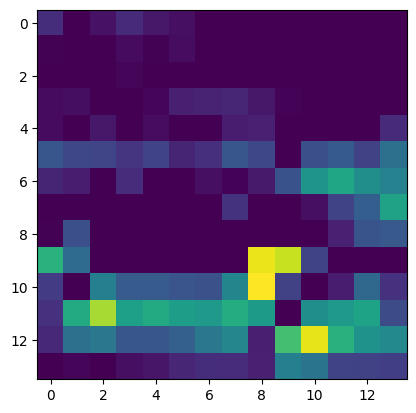

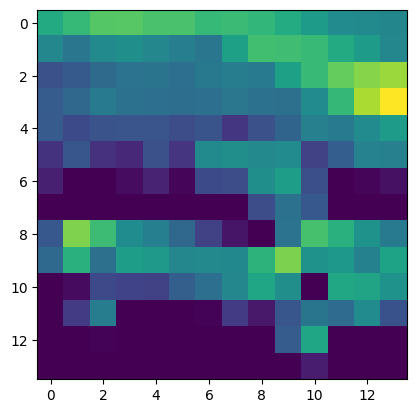

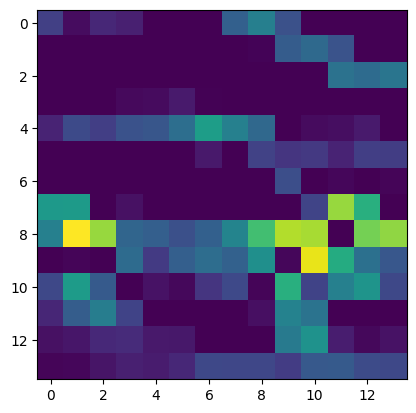

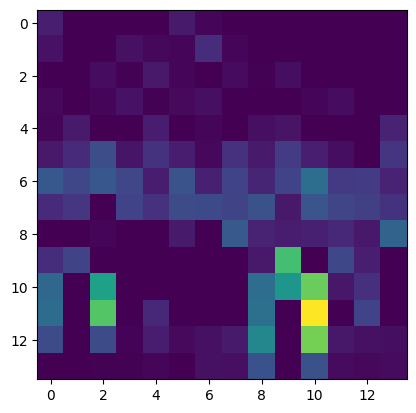

In [ ]:
dataloader = DataLoader(training_data, batch_size=batch_size)

dataiter = iter(dataloader)
images, labels = next(dataiter)
id = 4
image = images[id]

out = feature_extractor(image.unsqueeze(0))

imshow(image)

print('conv1')
for i in range(6):
    plt.imshow(out['0'][0,i].detach())
    plt.show()

print('relu')
for i in range(6):
    plt.imshow(out['1'][0,i].detach())
    plt.show()

print('pool')
for i in range(6):
    plt.imshow(out['2'][0,i].detach())
    plt.show()

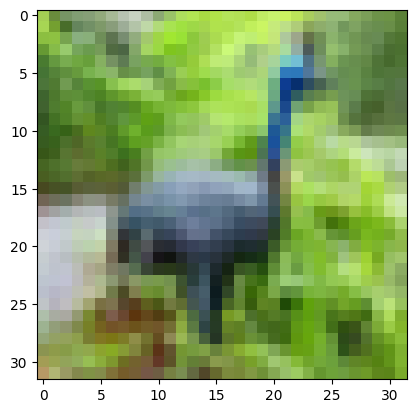

conv1


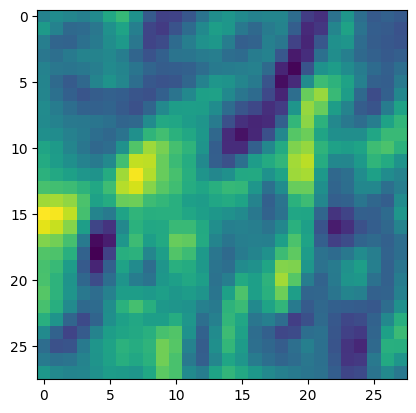

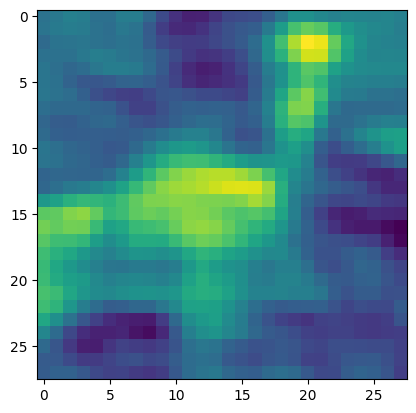

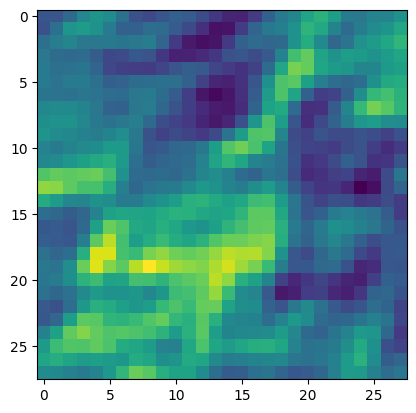

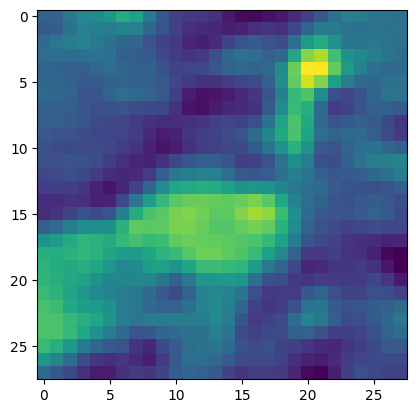

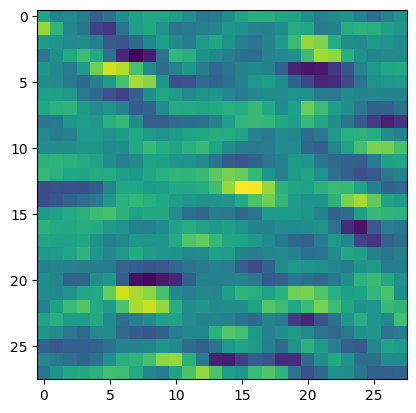

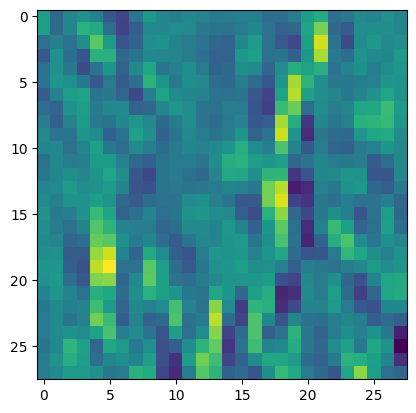

relu


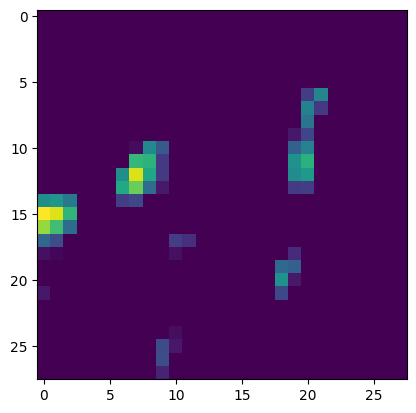

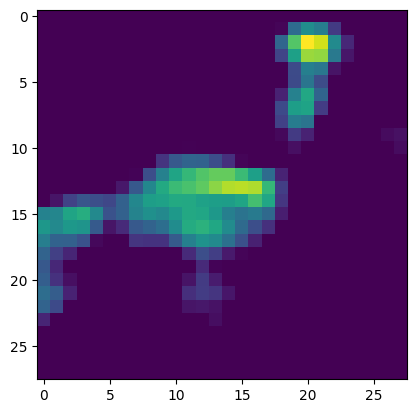

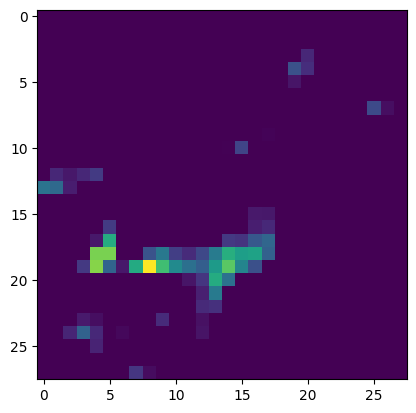

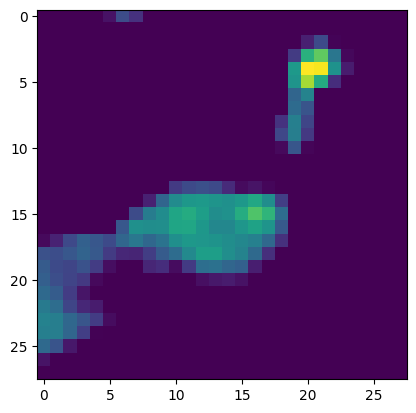

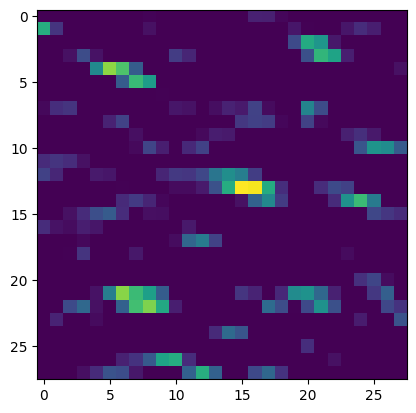

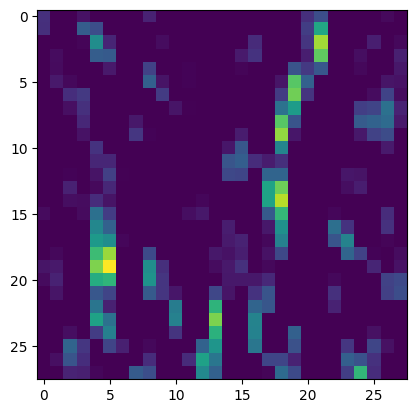

pool


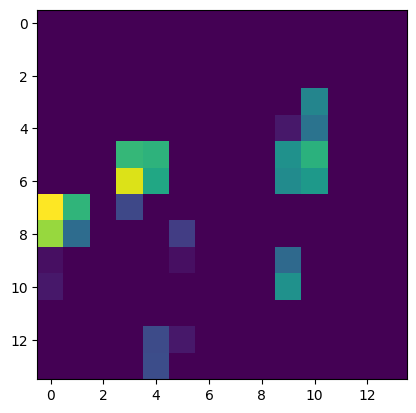

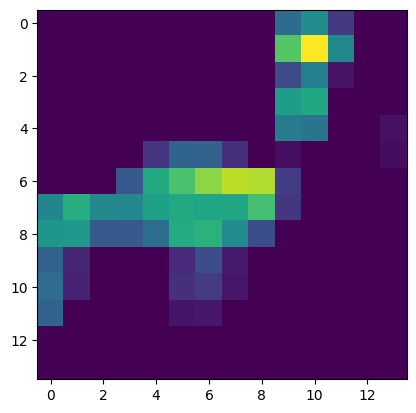

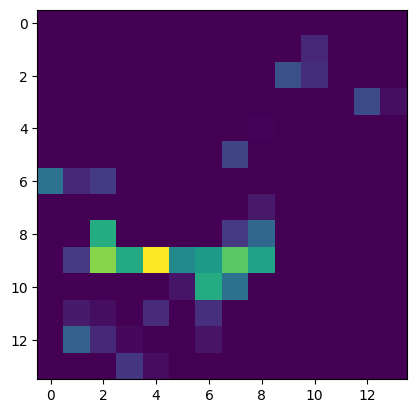

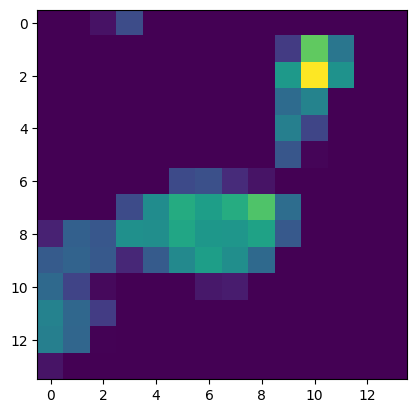

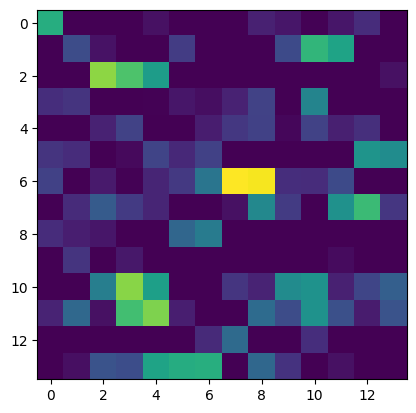

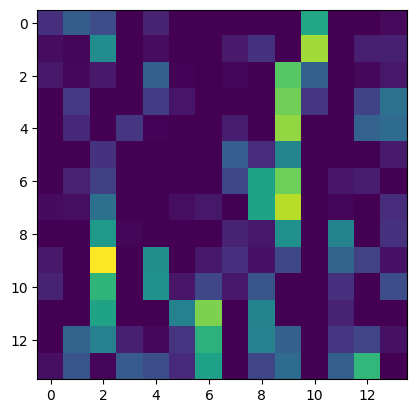

In [ ]:
id = 6
image = images[id]

out = feature_extractor(image.unsqueeze(0))

imshow(image)

print('conv1')
for i in range(6):
    plt.imshow(out['0'][0,i].detach())
    plt.show()

print('relu')
for i in range(6):
    plt.imshow(out['1'][0,i].detach())
    plt.show()

print('pool')
for i in range(6):
    plt.imshow(out['2'][0,i].detach())
    plt.show()

2. Can we look at what a particular neuron reacts to? What are the features learned by deep models? A simple idea to visualize these features, called activation maximization, consists in looking for the input with bounded norm that maximizes the activation of a given neuron ($x^* = \arg \max_{x: \; \|x\|=1} h_i^{\ell}(x,\theta^*)$, where $h_i^\ell$ is the activation of the neuron $i$ at layer $\ell$ of a trained network). Open https://distill.pub/2017/feature-visualization/appendix and check how the neurons in different layers of the GoogLeNet network are specializing to recognize features with various complexity, from simple textures to meaningful semantic concepts!